In [33]:
import pandas as pd 
from pymorphy3 import MorphAnalyzer
from matplotlib import pyplot as plt 
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords 
from mlxtend.preprocessing import TransactionEncoder 
from wordcloud import WordCloud 
df = pd.read_csv('pretty_car_price_dataset.csv') 
print(df.head(5))

        Бренд  Модель   Год  Объём двигателя Тип топлива     Трансмиссия  \
0         Kia     Rio  2020              4.2      Diesel          Manual   
1   Chevrolet  Malibu  2012              2.0      Hybrid       Automatic   
2    Mercedes     GLA  2020              4.2      Diesel       Automatic   
3        Audi      Q5  2023              2.0    Electric          Manual   
4  Volkswagen    Golf  2003              2.6      Hybrid  Semi-Automatic   

   Пробег  Количество дверей  Количество владельцев  Стоимость  
0  289944                  3                      5       8501  
1    5356                  2                      3      12092  
2  231440                  4                      2      11171  
3  160971                  2                      1      11780  
4  286618                  3                      3       2867  


Вывод уникального количества значений для выбранных колонок \
Формирование нового датасета

In [34]:
columns = ['Бренд', 'Модель', 'Тип топлива', 'Трансмиссия']
for column in columns:
    unique_values = len(set(df[column]))
    print(f"Уникальных значений в столбце '{column}': {unique_values}")

Уникальных значений в столбце 'Бренд': 10
Уникальных значений в столбце 'Модель': 30
Уникальных значений в столбце 'Тип топлива': 4
Уникальных значений в столбце 'Трансмиссия': 3


Построение облака слов на основе исходных данных

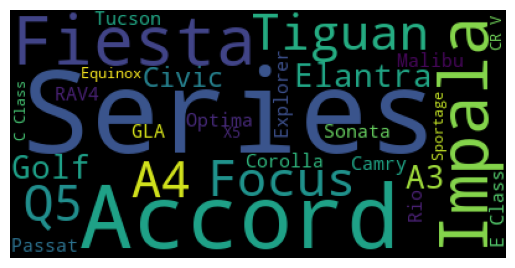

In [35]:
text = " ".join(df['Модель'])
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()

Очистка данных от стоп-слов и поиск лемм

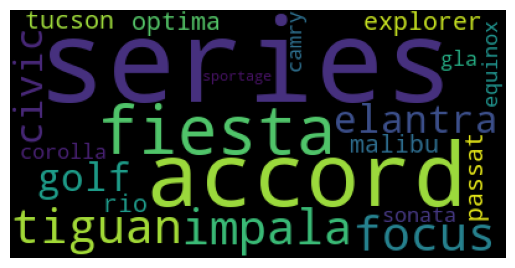

In [36]:
stop_words = stopwords.words('russian') 
text = " ".join(df['Модель']) 
tokens = word_tokenize(text.lower())
tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
lemmatizer = MorphAnalyzer() 
lemmatized_tokens = []
for word in tokens:
    parsed_word = lemmatizer.parse(word)[0]
    lemmatized_tokens.append(parsed_word.normal_form)
text = " ".join(lemmatized_tokens)
cloud = WordCloud(stopwords=stop_words).generate(text) 
plt.imshow(cloud) 
plt.axis('off') 
plt.show()